# EDA To Prediction (DieTanic)

## Part 1: EDA

### Load Module & Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('../Data/Titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age'와 'Cabin'에 null values가 있다! => 해결해야함.

### How many survived?

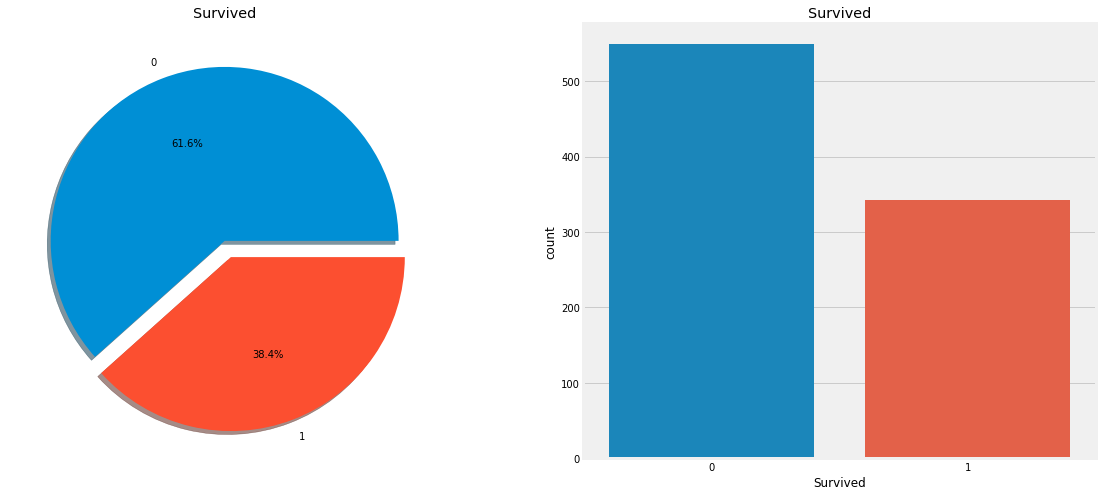

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# explode => 부채꼴이 pie char 중심에서 벗어나는 정도
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

- 이는 사고에서 많은 승객이 살아남지 못했다는 것을 의미한다.

- 891명의 승객이 training set에 있고, 이 중 **38.4%** 인 350명 만이 살아남았다.
- 더 자세히 파고 들어서 어떤 카테고리에 속한 승객이 더 생존했고 또, 그러지 못했는 지 알아내야 한다.

- dataset 상의 서로 다른 feature에 대해서 생존률을 확인해나갈 것이다.

### Feature의 종류

#### Categorical Features :

성별과 같이 어떤 카테고리에 속하지만, 순서를 정할 수 없는 경우 이다.

> Dataset : Sex, Embarked

#### Ordinal Features :

categorical value와 비슷하지만, '키'처럼 어떤 기준에 대해 순서를 정할 수 있는 경우이다.

> Dataset : PClass

#### Continous Features :

연속의 실수 값으로 이루어진 경우이다.

> Dataset : Age

### Analysing The Features

#### Sex -> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

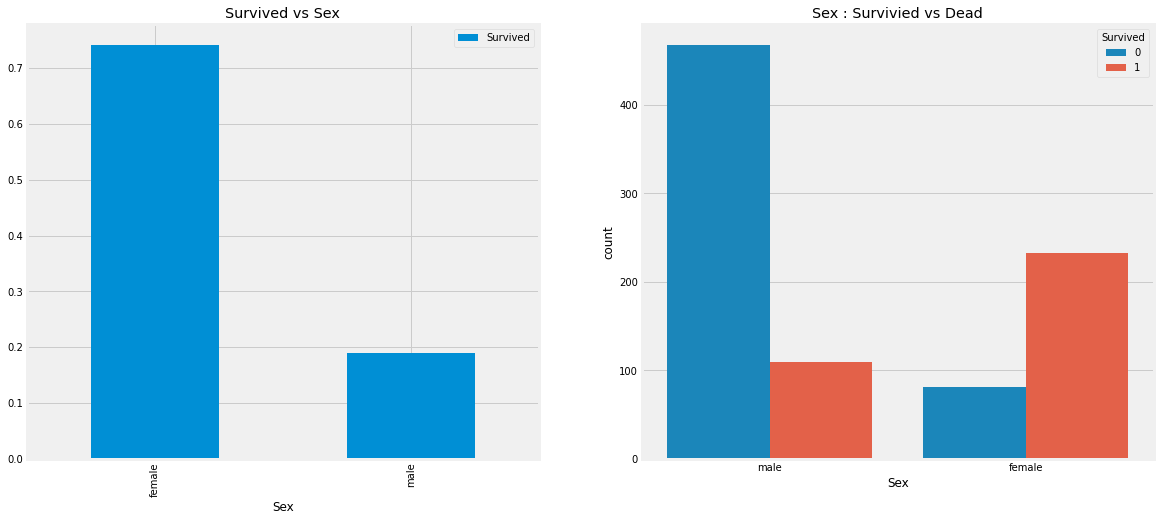

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survivied vs Dead')

plt.show()

- 여성의 생존률이 남성의 생존률보다 2배 이상 높았다.
    - 여성의 생존률 : **75%**
    - 남성의 생존률 : **18-19%**

**이는 Modeling에 있어서 매우 중요한 feature로 보여진다.**

#### PClass -> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- pd.crosstab()

> 범주형 변수로 되어있는 feature를 도수분포표, 교차표를 만들어주는 함수

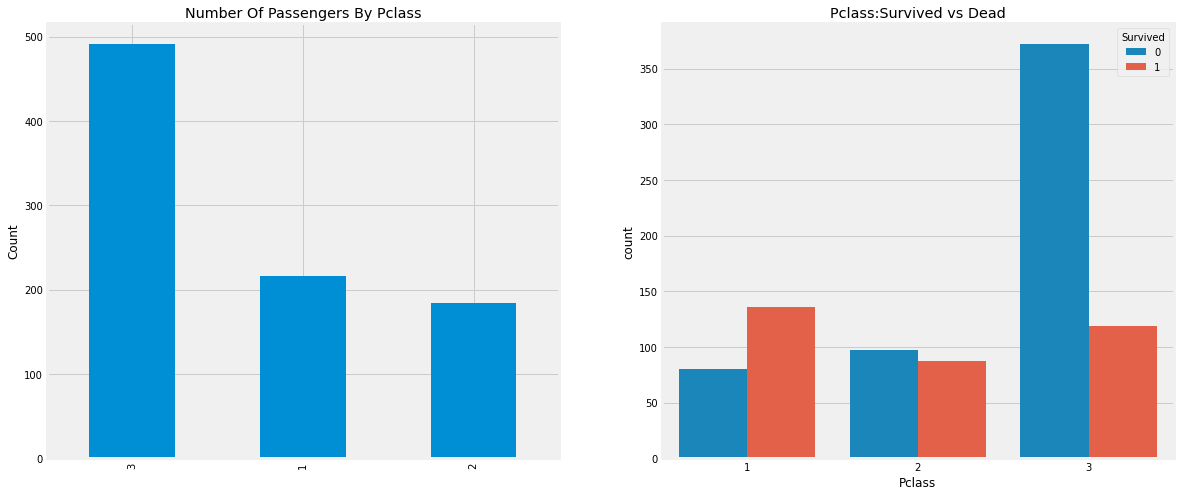

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

- Pclass 1인 승객의 구조 우선순위가 1등인 것을 확인할 수 있다.
    > Pclass가 1인 승객의 생존률이 가장 높았다.
- Pclass가 3인 승갱의 수가 훨씬 많지만, 생존률은 거의 25%에 가깝다.
    - 이는 Pclass가 1인 승객의 생존률이 63%이고, Pclass가 2인 승객의 생존률이 48%인 것과 대조적이다.

**Pclass와 Sex를 함께 놓고 비교해보자!!**

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

<Figure size 432x288 with 0 Axes>

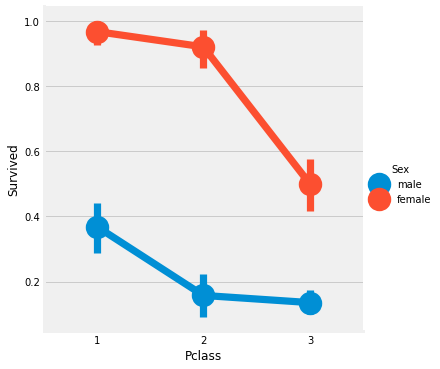

In [19]:
plt.figure()
sns.factorplot('Pclass', 'Survived', hue="Sex", data=data)
plt.show()

- `FactorPlot()`이 categorical value를 표현하기 쉬워서 사용함.
- `CrossTab`과 `FactorPlot`을 살펴보았을 때, 
    - Pclass가 1인 여성의 생존률이 95-96% 이며, 오직 3명만 살아남지 못했다.
- 이를 통해 Pclass와 상관없이 **여성이 구조에 있어 우선순위를 가졌다는 것을 알 수 있다.**
    - Pclass가 1인 남성들도 매우 낮은 생존률을 보였기 때문이다.

**Pclass도 아주 중요한 feature로 보여진다. 다른 feature도 살펴보자**

#### Age -> Continous Feature

In [20]:
print(f'가장 나이가 많은 승객의 나이 : {data.Age.max()} Years')
print(f'가장 어린 승객의 나이 : {data.Age.min()} Years')
print(f'승객들의 평균 나이 : {data.Age.mean()} Years')

가장 나이가 많은 승객의 나이 : 80.0 Years
가장 어린 승객의 나이 : 0.42 Years
승객들의 평균 나이 : 29.69911764705882 Years


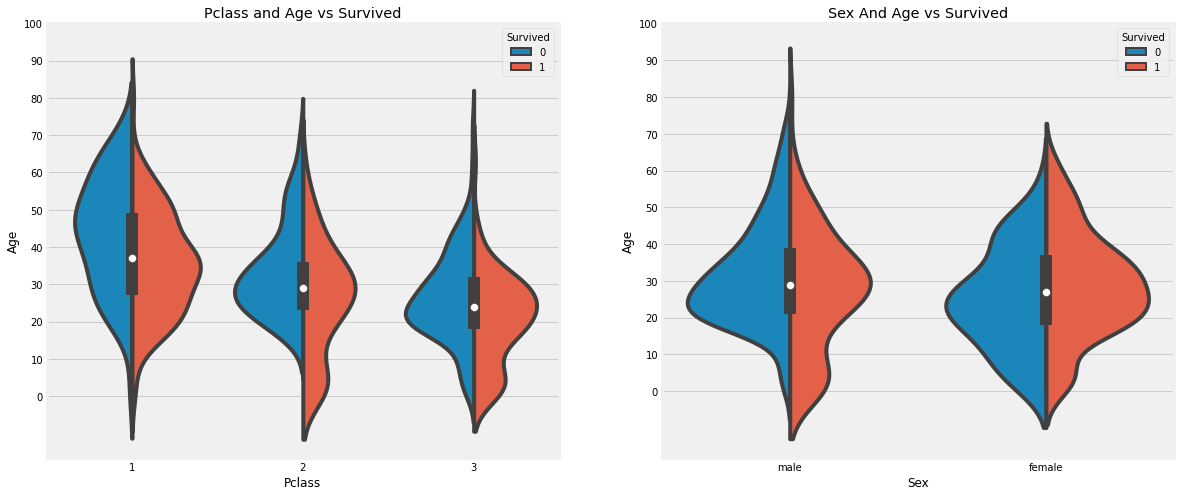

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex And Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

**Observations**

1. Pclass가 낮은 등급일 수 록 Children의 수 가 많아지며, Pclass에 상관없이 10살 이하의 승객 생존률이 좋아보인다.
    > Pclass의 10세 이하 나이대 차트를 보았을 때, Pclass 1에서는 홀쭉하지만, Pclass가 낮은 등급일 수 록 밑 부분이 두툽해진다. 이는 그 나이대의 승객 비율이 Pclass가 낮은 등급일 수 록 많이 포함되어 있다는 것을 의미한다.

2. Pclass가 1인 승객들중 20-50대 승객의 생존률이 좋아보이며, 이는 여성의 경우 더 높게 나타난다.
    > Pclass 1의 차트에서 20-50대 부분의 생존률이 높게 올라와 있는 것을 확일 할 수 있고, 오른쪽 그래프에서 해당 나이대의 생존률이 남성보다 여성 쪽이 더 많이 올라와 있기 때문에 이와 같이 해석될 수 있다.
3. 남성의 경우 age가 증가할 수 록 생존률이 감소한다.
    > 오른쪽 그래프에서 나이가 증가할 수록 파란색(survived=0)인 부분의 넓이가 상대적으로 더 넓게 나타나고, 이러한 경향은 왼쪽 그래프에서도 마찬가지 이다.


- 우리가 앞서 보았듯이, Age는 177개의 null values를 포함하고 있다. 이를 채워주기 위해 dataset의 mean value를 채택한다.
- 하지만 문제점은, 어떤 승객이 어떤 나이였을 지 확인할 수 없다는 것이다.
    - 우리는 **어떤 승객이 어떤 나이대에 분포할 지 알아낼 방법**이 필요하다.

**우리는 `Name` feature를 고려할 수 있을 것이다.**

- 'Name' feature에 포함되어있는 'Mr', 'Ms' 같은 내용을 확인하여 해당 하는 Name을 가진 row들의 나이 대를 넣어줄 수 있을 것이다.

In [42]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

# ([A-Za-z]+)\.
# => 영어인 단어들 중 뒤에 .이 붙는 단어를 가져와!
# [A-Z] -> 영문 대문자인 것 가져와(처음 것)
# [a-z] -> 영문 소문자인 것 가져와(처음 것)
# [A-Za-z] -> 영문 글자 가져와(처음 것)
# [A-Za-z]+ -> 영문 단어 가져와(처음 것)
# ([A-Za-z]+)\. -> 영문 단어인데 뒤에 .이 붙는 단어 가져와
# + -> 조건에 맞는 부분을 띄어쓰기를 기준으로 다 가져오기

In [43]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 'Mlle'와 'Mme' => 'Miss'의 오타...!
- 잘 못 된 것들을 제대로 채워주기..?

In [44]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [45]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [46]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [47]:
data.Age.isnull().any() #So no null values left finally

False

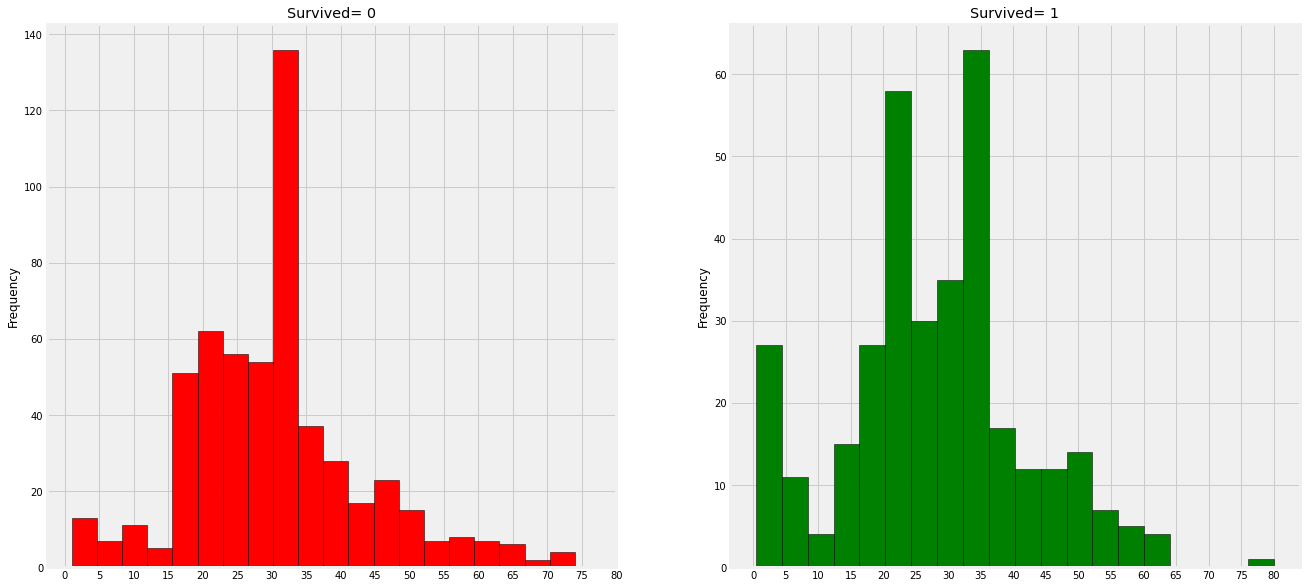

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,color='red', edgecolor='black')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

**Observations:**

1. 5세 이하 영유아는 생존률이 많이 높다. (Women and child First policy)
2. 가장 나이가 많은 승객은 구해졌다. (80 years)
3. 가장 많이 죽은 나이대는 30-40대이다.

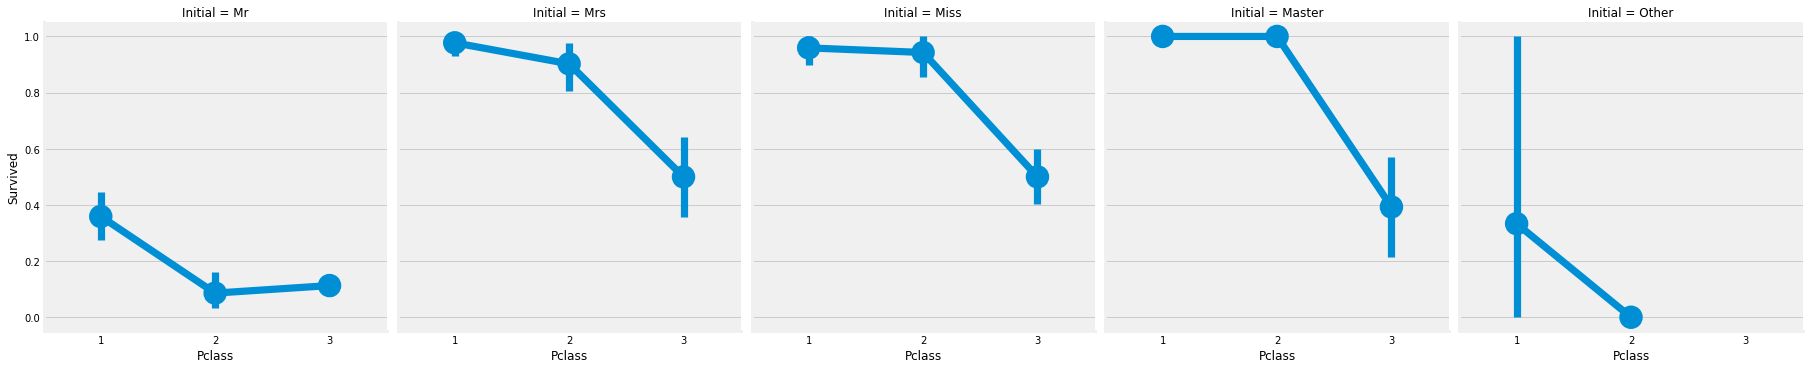

In [52]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

The Women and Child first policy가 승객 class에 관계없이 지켜진 것을 확인할 수 있다.

#### Embarked-> Categorical

In [53]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**Embarkation에 따른 생존확률**

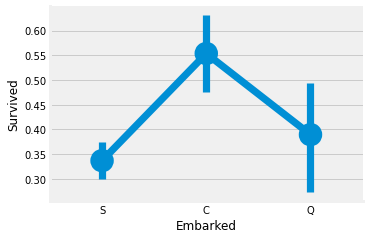

In [54]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() # 현재의 figure객체를 구할 수 있다. (없으면 만들어주고, 있으면 거기에 그리는 듯)
fig.set_size_inches(5,3)
plt.show()

Port C에서 탑승한 승객의 생존률이 55%정도로 가장 높았고, S에서 탑승한 사람이 가장 생존률이 낮았다.

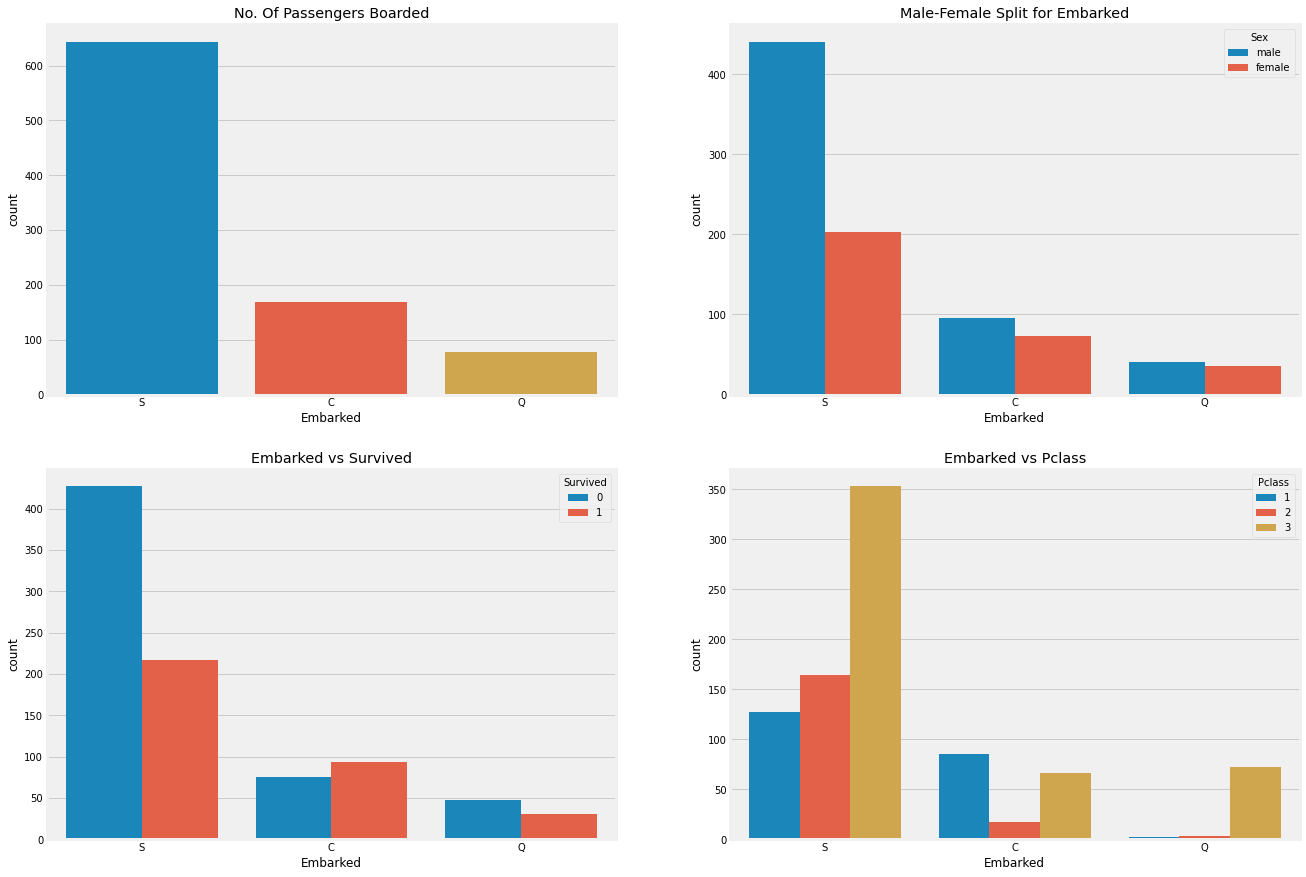

In [58]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

# plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()

**Observations:**

1. S에서 탄 승객은 그 대부분이 Pclass 3에 속한다.
2. C에서 탄 승객은 많이 살아남았다. 아마도 Pclass가 1, 2인 승객이 많이 구해졌기 때문일 것이다.
3. S 탑승지는 아마 부유한 사람이 많았을 것이다.
    - S에서 탑승한 승객의 생존률이 낮기는 하지만, 그것은 81% 정도의 Pclass가 3이었던 승객이 살아남지 못했기 때문이다.
4. Q 탑승지는 95% 의 승객이 pclass 3에 속한다.

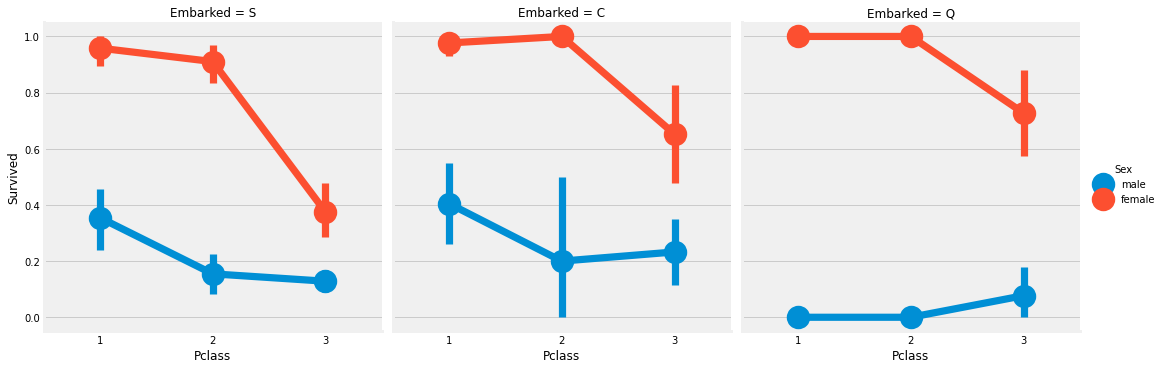

In [59]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**Observation**

1. Pclass 1, 2에 속하는 여성 탑승객의 거의 다 살아남았다.
2. S에서 탑승한 Pclass 3승객들은 여성과 남성 모두 생존률이 낮게 나왔다.
3. Q에서 탑승한 남성들은 거의 pclass 3였기 때문에 대부분 살아남지 못했다.